# Customer Segmentation

Customer Segmentation - Group Project
Customer Segmentation
Problem Statement:  XYZ bank wants to roll out Christmas offers to their customers. But Bank does not want to roll out same offer to all customers  instead they want to roll out personalized offer to particular set of customers. If they manually start understanding the category of customer then this will be not efficient and also they will not be able to uncover the hidden pattern in the data ( pattern which group certain kind of customer in one category). Bank approached ABC analytics company to solve their problem. Bank also shared information with ABC analytics that they don't want more than 5 group as this will be inefficient for their campaign.

ML Problem: ABC analytics proposed customer segmentation approach to Bank.

ABC analytics assigned this talk to their analytics team and instructed their team to come up with the approach and feature which group similar behavior customer in one category and others in different category.

Note: Please read problem statement carefully and propose the approach which should be as per the customer requirement.

Task:

1. Business Understanding

2. Data Understanding

3. EDA

4. Feature Engineering

4. Model Building

5. Model Evaluation

6. Presentation (Recommendation slide is must)

7. Document the challenges

|**Column Name**|Description|
| --- | --- |
|**fecha_dato**|The table is partitioned for this column|
|**cust_code**|	Customer code|
|**emp_index**|Employee index: A active, B ex employed, F filial, N not employee, P pasive|
|**cust_residence**|Customer's Country residence|
|**'cust_gender**|Customer's sex|
|**age**|Age|
|**first_holder_date**|The date in which the customer became as the first holder of a contract in the bank|
|**new_cust_index**|New customer Index. 1 if the customer registered in the last 6 months|
|**cust_seniority**|Customer seniority (in months)|
|**indrel**|1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)|
|**last_date_primary_cust**|Last date as primary customer (if he isn't at the end of the month)|
|**cust_type**|Customer type at the beginning of the month: 1 (First/Primary customer), 2 (co-owner), P (Potential), 3 (former primary), 4(former co-owner)|
|**cust_rel_time**|Customer relation type at the beginning of the month: A (active), I (inactive), P (former customer), R (Potential)|
|**cust_res_index**|Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)|
|**'is_foreign**|Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)|
|**cust_spouse_index**|Spouse index. 1 if the customer is spouse of an employee|
|**channel_to_join**|channel used by the customer to join|
|**deceased_index**|Deceased index. N/S|
|**addres_type**|Addres type. 1, primary address|
|**cod_prov**|Province code (customer's address)|
|**name_province**|Province name|
|**activity_index**|Activity index (1, active customer; 0, inactive customer)|
|**household_income**|Gross income of the household|
|**saving_acc**|Saving Account|
|**guarantees**|Guarantees|
|**current_acc**|Current Accounts|
|**derivada_acc**|Derivada Account|
|**payroll_acc**|Payroll Account|
|**junior_acc**|Junior Account|
|**mass_particular_acc**|Más particular Account|
|**particular_acc**|particular Account|
|**particular_plus_acc**|particular Plus Account|
|**short_term_deposit**|Short-term deposits|
|**long_term_deposit**|Medium-term deposits|
|**ind_dela_fin_ult1**|Long-term deposits|
|**e_account**|e-account|
|**funds**|Funds|
|**mortgage**|Mortgage|
|**pensions1**|Pensions|
|**loans**|Loans|
|**taxes**|Taxes|
|**credit_card**|Credit Card|
|**securities**|Securities|
|**home_account**|Home Account|
|**payroll**|Payroll|
|**pensions2**|Pensions|
|**direct_debit**|Direct Debit|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio
template = 'simple_white'

import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

seed = 42

In [2]:
df = pd.read_csv("C:/Users/joean/Desktop/Data Science/Personal Projects/cust_seg.csv")
df

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1
999996,999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,0
999997,999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1
999998,999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   fecha_dato             1000000 non-null  object 
 2   ncodpers               1000000 non-null  int64  
 3   ind_empleado           989218 non-null   object 
 4   pais_residencia        989218 non-null   object 
 5   sexo                   989214 non-null   object 
 6   age                    1000000 non-null  object 
 7   fecha_alta             989218 non-null   object 
 8   ind_nuevo              989218 non-null   float64
 9   antiguedad             1000000 non-null  object 
 10  indrel                 989218 non-null   float64
 11  ult_fec_cli_1t         1101 non-null     object 
 12  indrel_1mes            989218 non-null   float64
 13  tiprel_1mes            989218 non-null   object 
 14  indresi            

In [4]:
df.columns

Index(['Unnamed: 0', 'fecha_dato', 'ncodpers', 'ind_empleado',
       'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo',
       'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom',
       'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [5]:
df.rename(columns = {
    'fecha_dato':'date', 
    'ncodpers':'cust_code', 
    'ind_empleado':'emp_index',
    'pais_residencia':'cust_residence', 
    'indext':'is_foreign', 
    'sexo':'cust_gender', 
    'fecha_alta':'first_holder_date',
    'ind_nuevo':'new_cust_index', 
    'antiguedad':'cust_seniority', 
    'ult_fec_cli_1t':'last_date_primary_cust', 
    'indrel_1mes':'cust_type', 
    'tiprel_1mes':'cust_rel_time', 
    'indresi':'cust_res_index',
    'conyuemp':'cust_spouse_index',
    'canal_entrada':'channel_to_join', 
    'nomprov':'name_province',
    'ind_actividad_cliente':'activity_index' ,
    'renta':'household_income',
    'tipodom':'addres_type',
    'indfall':'deceased_index',
    'ind_ahor_fin_ult1':'saving_acc', 
    'ind_aval_fin_ult1': 'guarantees', 
    'ind_cder_fin_ult1':'derivada_acc', 
    'ind_cno_fin_ult1':'payroll_acc',
    'ind_ctju_fin_ult1':'junior_acc',
    'ind_ctma_fin_ult1':'mass_particular_acc', 
    'ind_ctop_fin_ult1':'particular_acc',
    'ind_ctpp_fin_ult1':'particular_plus_acc', 
    'ind_deco_fin_ult1':'short_term_deposit', 
    'ind_deme_fin_ult1':'medium_term_deposits', 
    'ind_dela_fin_ult1':'long_term_deposits',
    'ind_ecue_fin_ult1':'e_account', 
    'ind_fond_fin_ult1':'funds', 
    'ind_hip_fin_ult1':'mortgage', 
    'ind_plan_fin_ult1':'pensions1', 
    'ind_pres_fin_ult1':'loans', 
    'ind_reca_fin_ult1':'taxes', 
    'ind_tjcr_fin_ult1':'credit_card', 
    'ind_valo_fin_ult1':'securities', 
    'ind_viv_fin_ult1':'home_account',
    'ind_cco_fin_ult1':'current_acc', 
    'ind_nomina_ult1':'payroll', 
    'ind_nom_pens_ult1':'pensions2', 
    'ind_recibo_ult1':'direct_debit'
}, inplace = True)

Dropping first two columns as they do not give much information.

In [6]:
df = df.iloc[:,2:]
df.head()

,cust_code,emp_index,cust_residence,cust_gender,age,first_holder_date,new_cust_index,cust_seniority,indrel,last_date_primary_cust,...,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit
0,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0


#### Checking for duplicate observations

`cust_code` contains customer codes. Lets check if there are duplicate customer codes

In [7]:
df['cust_code'].value_counts()

281941     2
362212     2
362218     2
362219     2
362220     2
          ..
1310578    1
1310579    1
1310645    1
1310643    1
1183305    1
Name: cust_code, Length: 626159, dtype: int64

There are duplicate customer codes. Since the bank wants to segment unique customers, I will drop observations with duplicate customer codes and keep only the last observation for each duplicated customer code observation.

In [8]:
df = df.drop_duplicates(subset = ['cust_code'], keep = "last").reset_index(drop = True)
print(df.shape)

(626159, 46)


In [9]:
1000000 - 626159

373841

Approximately 370K+ duplicated observation has been removed.

In [10]:
df['cust_code'].value_counts().sum()

626159

Now, all customer codes are unique. I will drop this variable has customer code does not give any information for customer segmentation.

In [11]:
df = df.drop('cust_code', axis = 1)
df.head()

,emp_index,cust_residence,cust_gender,age,first_holder_date,new_cust_index,cust_seniority,indrel,last_date_primary_cust,cust_type,...,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit
0,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


#### Checking for missing values

In [12]:
#checking percentage of missing values for every variable.
df.isna().sum()/len(df)*100

emp_index                  1.115531
cust_residence             1.115531
cust_gender                1.115851
age                        0.000000
first_holder_date          1.115531
new_cust_index             1.115531
cust_seniority             0.000000
indrel                     1.115531
last_date_primary_cust    99.876549
cust_type                  1.115531
cust_rel_time              1.115531
cust_res_index             1.115531
is_foreign                 1.115531
cust_spouse_index         99.985786
channel_to_join            1.123676
deceased_index             1.115531
addres_type                1.115531
cod_prov                   1.703561
name_province              1.703561
activity_index             1.115531
household_income          17.841475
saving_acc                 0.000000
guarantees                 0.000000
current_acc                0.000000
derivada_acc               0.000000
payroll_acc                0.000000
junior_acc                 0.000000
mass_particular_acc        0

Deleting variables having percentage of missing values higher than 20%

In [13]:
missing_info = (df.isna().sum()/len(df)*100)

to_drop = missing_info[missing_info.values > 20].index #setting threshold

print(f"columns to drop: {to_drop}")
print()

df = df.drop(to_drop, axis = 1).reset_index(drop = True)
print(df.shape)

columns to drop: Index(['last_date_primary_cust', 'cust_spouse_index'], dtype='object')

(626159, 43)


Checking unique values for each variable

In [14]:
for col in df.columns:
    print(col, ":", df[col].unique())
    print()

emp_index : ['N' nan 'A' 'B' 'F' 'S']

cust_residence : ['ES' nan 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL' 'RU' 'GT'
 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'CZ' 'ET' 'CM' 'SA' 'CI'
 'QA' 'SG' 'BO' 'BZ' 'UY' 'MD' 'BA' 'CF' 'KR' 'LU' 'NG' 'CD' 'ZA' 'AU'
 'KZ' 'CU' 'DK' 'JP' 'SK' 'GM' 'AO' 'HR' 'PK' 'PA' 'MK' 'LY' 'LT' 'TH'
 'GQ' 'GN' 'TR' 'IS' 'KE' 'VN' 'RS' 'AD' 'NZ' 'OM' 'EG' 'LV' 'ML' 'CG'
 'GW' 'HU' 'DZ' 'SL' 'GI' 'KH' 'MM' 'BY' 'PH' 'KW' 'GH' 'TN' 'TG' 'LB'
 'GE']

cust_gender : ['H' 'V' nan]

age : [' 35' ' 23' ' 22' ' 24' ' 65' ' 28' ' 25' ' 26' ' 53' ' 27' ' 32' ' 37'
 ' 31' ' 39' ' 63' ' 33' ' 55' ' 42' ' 58' ' 38' ' 50' ' 30' ' 45' ' 44'
 ' 36' ' 29' ' 60' ' 57' ' 67' ' 47' ' NA' ' 34' ' 48' ' 46' ' 54' ' 84'
 ' 15' ' 12' '  8' '  6' ' 83' ' 40' ' 77' ' 69' ' 52' ' 59' ' 43' ' 10'
 '  9' ' 49' ' 41' ' 51' ' 78' ' 16' 

Lets analyze each variable. First I will begin with `emp_index` and filter those observations with missing values.

#### `emp_index`: Employee index

In [15]:
df[df['emp_index'].isna()]

,emp_index,cust_residence,cust_gender,age,first_holder_date,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,...,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit
261,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1029,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1063,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1154,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1779,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624939,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
625270,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0
625274,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
625736,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


In [16]:
df[df['emp_index'].isna()].isna().sum()

emp_index               6985
cust_residence          6985
cust_gender             6985
age                        0
first_holder_date       6985
new_cust_index          6985
cust_seniority             0
indrel                  6985
cust_type               6985
cust_rel_time           6985
cust_res_index          6985
is_foreign              6985
channel_to_join         6985
deceased_index          6985
addres_type             6985
cod_prov                6985
name_province           6985
activity_index          6985
household_income        6985
saving_acc                 0
guarantees                 0
current_acc                0
derivada_acc               0
payroll_acc                0
junior_acc                 0
mass_particular_acc        0
particular_acc             0
particular_plus_acc        0
short_term_deposit         0
medium_term_deposits       0
long_term_deposits         0
e_account                  0
funds                      0
mortgage                   0
pensions1     

There are about 6985 observation having missing values across multiple columns. It would be impossible to impute these observations with meaning full information as other columns belonging to same observation has missing values too. Therefore, I will drop these observations.

In [17]:
to_drop = df[df['emp_index'].isna()].index

df = df.drop(index = to_drop, axis = 0).reset_index(drop = True)
print(df.shape)

(619174, 43)


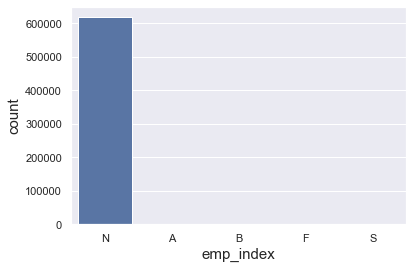

In [18]:
sns.countplot(df['emp_index']);

In [19]:
print(df['emp_index'].value_counts())
print()
print(df['emp_index'].value_counts(normalize = True)*100)

N    618694
B       194
A       144
F       141
S         1
Name: emp_index, dtype: int64

N    99.922477
B     0.031332
A     0.023257
F     0.022772
S     0.000162
Name: emp_index, dtype: float64


Employee index: 
* A: active, 
* B: ex employed, 
* F: filial, 
* N: not employee, 
* P: pasive

Almost all customers are active. Only a small negligible portion of customers belong to other categories. 

#### `cust_residence`: Customer's Country residence

In [20]:
any(df['cust_residence'].isna()) # No Missing values

False

In [21]:
print(df['cust_residence'].value_counts())
print()
df['cust_residence'].value_counts(normalize = True)*100

ES    615491
FR       288
AR       276
DE       257
GB       254
       ...  
CD         1
KZ         1
GM         1
IS         1
GE         1
Name: cust_residence, Length: 113, dtype: int64



ES    99.405175
FR     0.046514
AR     0.044576
DE     0.041507
GB     0.041022
        ...    
CD     0.000162
KZ     0.000162
GM     0.000162
IS     0.000162
GE     0.000162
Name: cust_residence, Length: 113, dtype: float64

99.4% of customers are from spain.

#### `'cust_gender`: Customer's Gender

In [22]:
df['cust_gender'].isna().sum() 

2

Imputing `'cust_gender` variable with the mode.

In [23]:
df['cust_gender'] = df['cust_gender'].fillna(df['cust_gender'].mode()[0])

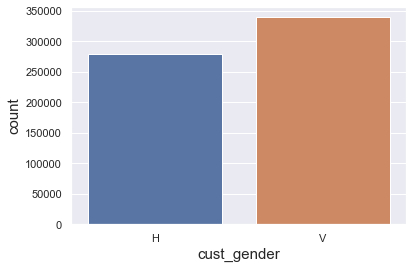

In [24]:
sns.countplot(df['cust_gender']);

'V' category is higher in proportion compared to 'H'

#### `age`: Age

In [25]:
df['age']

0          35
1          23
2          23
3          22
4          23
         ... 
619169     27
619170     56
619171     39
619172     36
619173     38
Name: age, Length: 619174, dtype: object

This variable is supposed to be numerical, but currently it is of object data type. In order to convert this variable to numerical, the 'NA' value must be dealt with first.

In [26]:
df.query('age == " NA"')

,emp_index,cust_residence,cust_gender,age,first_holder_date,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,...,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit


Luckily, when dealing with missing values in `emp_index`, the NA values in `age` has also been removed.

In [27]:
#Converting age to numerical
df['age'] = df['age'].str.strip().astype('int64')

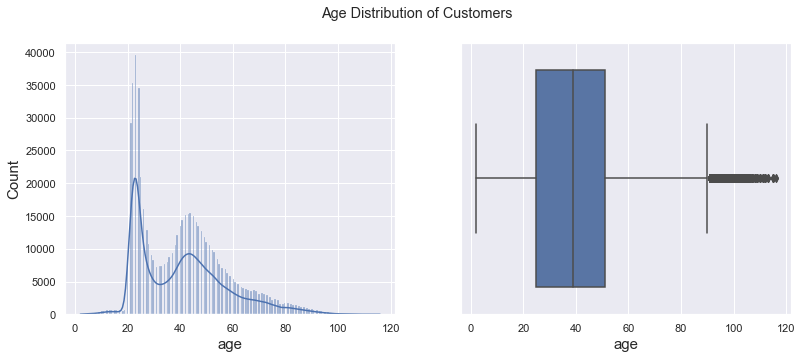

In [28]:
fig, ax = plt.subplots(1,2, figsize = (13,5));

sns.histplot(df['age'], kde = True, ax = ax[0]);
sns.boxplot(x = 'age', data = df, ax = ax[1]);

plt.suptitle("Age Distribution of Customers");

Age distribution is Bi-modal, where majority of customers are young, between the age of 20-30, followed by older customers, between the age of 40 and 50. There seems to outliers in both sides of the distribution.

In [29]:
df['age'].describe()

count    619174.000000
mean         40.492146
std          17.062744
min           2.000000
25%          25.000000
50%          39.000000
75%          51.000000
max         116.000000
Name: age, dtype: float64

There are customers as young as 2 years and customers as old as 116 years!

I will assign ages below 18 as 18. For ages older than 85, I will assign 85.

This method will take care of outliers on both sides of the distribution.

In [30]:
#Ages where below 18 will be assigned as 24, and ages above 85 will be assigned as 45.
# df['age'] = np.where(df['age'] < 20, 18, (np.where(df['age'] > 85, 85, df['age'])))

In [31]:
# fig, ax = plt.subplots(1,2, figsize = (13,5));

# sns.histplot(df['age'], kde = True, ax = ax[0]);
# sns.boxplot(x = 'age', data = df, ax = ax[1]);

# plt.suptitle("Age Distribution of Customers");

There are no more outliers in the age distribution.

#### `first_holder_date`: the date in which the customer became as the first holder of a contract in the bank

In [32]:
print(any(df['first_holder_date'].isna())) #No missing value
print()
df['first_holder_date']

False



0         2015-01-12
1         2012-08-10
2         2012-08-10
3         2012-08-10
4         2012-08-10
             ...    
619169    2013-09-25
619170    2013-09-25
619171    2013-09-25
619172    2013-09-25
619173    2013-09-25
Name: first_holder_date, Length: 619174, dtype: object

Converting to Datetime format

In [33]:
df['first_holder_date'] = pd.to_datetime(df['first_holder_date'])

In [34]:
df['first_holder_date_year'] = df.first_holder_date.dt.year #Extracting years
df['first_holder_date_month'] = df.first_holder_date.dt.month #extracting months
df['first_holder_date_day'] = df.first_holder_date.dt.weekday #extracting day of week

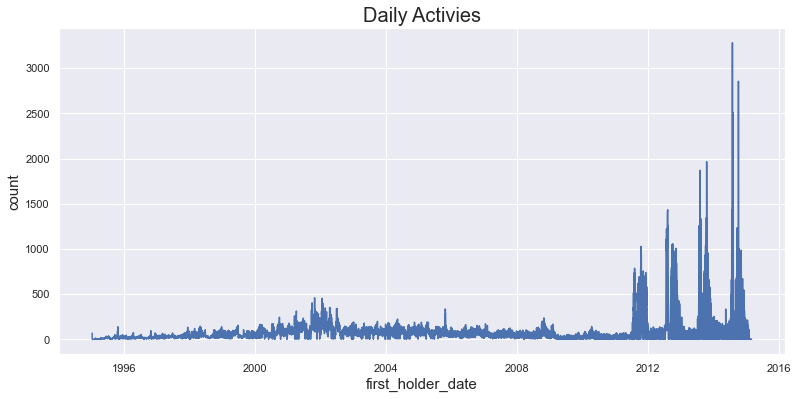

In [35]:
temp_df = df.groupby('first_holder_date').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'first_holder_date', y = 'count', data = temp_df);
ax.set_title("Daily Activies");

There is a significant spike in customers after 2010. There seems to be an upward trand and seasonality in number of customers.

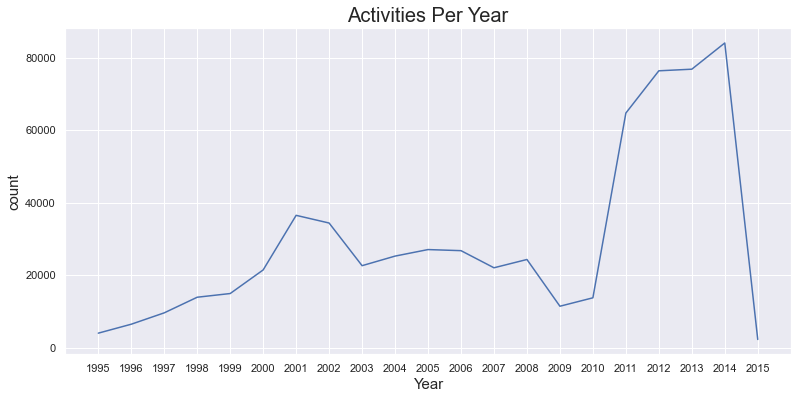

In [36]:
temp_df = df.groupby('first_holder_date_year').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'first_holder_date_year', y = 'count', data = temp_df);
ax.set_xticks(np.arange(1995, 2016, 1));
ax.set_title("Activities Per Year");
ax.set_xlabel("Year");

Years between 2011 and 2014 saw the highest number of applicants compared to other years

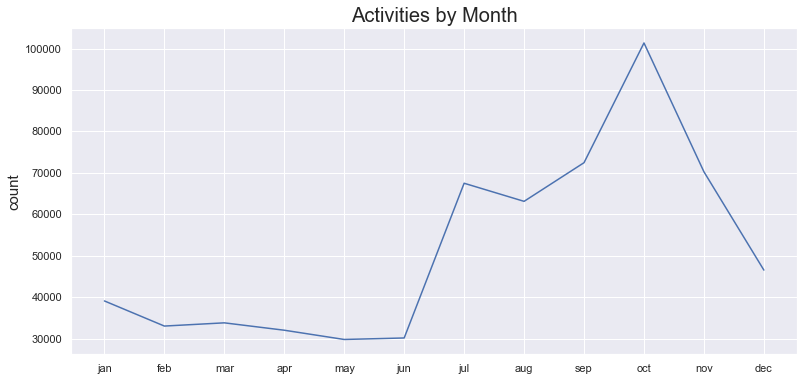

In [37]:
temp_df = df.groupby('first_holder_date_month').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'first_holder_date_month', y = 'count', data = temp_df);
plt.xticks(np.arange(1, 13, 1), ["jan", "feb", "mar", "apr", "may", "jun", "jul",
                                 "aug", "sep", "oct", "nov", "dec"]);
ax.set_title("Activities by Month");
ax.set_xlabel("");

For all years, most customers join during the month of october.

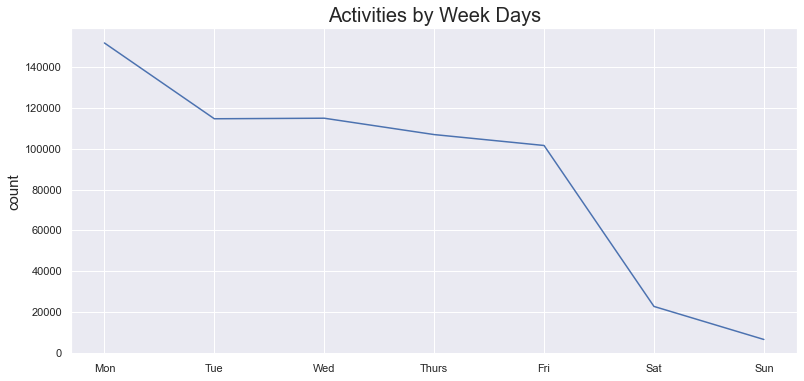

In [38]:
temp_df = df.groupby('first_holder_date_day').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'first_holder_date_day', y = 'count', data = temp_df);
plt.xticks(np.arange(0, 7, 1), ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);
ax.set_title("Activities by Week Days");
ax.set_xlabel("");

Monday sees the highest number of customers. Number of customers are lowest during the weekends.

28th to 32nd week in a year shows an increase in number of customers (july to august) followed by an increase again during week 40 (October).

In [39]:
#Dropping `fetcha_alta` as all the important information has already been extracted.

df = df.drop('first_holder_date', axis = 1)
df

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,...,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day
0,N,ES,H,35,0.0,6,1.0,1.0,A,S,...,0,0,0,0,0.0,0.0,0,2015,1,0
1,N,ES,V,23,0.0,35,1.0,1.0,I,S,...,0,0,0,0,0.0,0.0,0,2012,8,4
2,N,ES,V,23,0.0,35,1.0,1.0,I,S,...,0,0,0,0,0.0,0.0,0,2012,8,4
3,N,ES,H,22,0.0,35,1.0,1.0,I,S,...,0,0,0,0,0.0,0.0,0,2012,8,4
4,N,ES,V,23,0.0,35,1.0,1.0,A,S,...,0,0,0,0,0.0,0.0,0,2012,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619169,N,ES,H,27,0.0,22,1.0,1.0,A,S,...,0,0,0,0,0.0,0.0,1,2013,9,2
619170,N,ES,H,56,0.0,22,1.0,1.0,A,S,...,0,0,0,0,0.0,0.0,0,2013,9,2
619171,N,ES,V,39,0.0,22,1.0,1.0,A,S,...,0,0,0,0,0.0,0.0,1,2013,9,2
619172,N,ES,V,36,0.0,22,1.0,1.0,A,S,...,0,0,0,0,0.0,0.0,1,2013,9,2


#### `new_cust_index`: New customer Index. 1 if the customer registered in the last 6 months.

In [40]:
print(any(df['new_cust_index'].isna())) #No missing value
print()
df['new_cust_index']

False



0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
619169    0.0
619170    0.0
619171    0.0
619172    0.0
619173    0.0
Name: new_cust_index, Length: 619174, dtype: float64

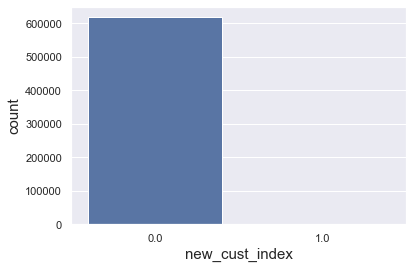

In [41]:
sns.countplot(df['new_cust_index']);

In [42]:
df['new_cust_index'].value_counts()

0.0    618776
1.0       398
Name: new_cust_index, dtype: int64

#### `cust_seniority`: Customer seniority (in months)

In [43]:
print(any(df['cust_seniority'].isna())) #No missing value
print()
df['cust_seniority']

False



0               6
1              35
2              35
3              35
4              35
           ...   
619169         22
619170         22
619171         22
619172         22
619173         22
Name: cust_seniority, Length: 619174, dtype: object

In [44]:
#converting to numerical

df['cust_seniority'] = df['cust_seniority'].astype('int64')

In [45]:
df['cust_seniority'].describe()

count    619174.000000
mean         80.290153
std        1798.578921
min     -999999.000000
25%          24.000000
50%          55.000000
75%         141.000000
max         246.000000
Name: cust_seniority, dtype: float64

In [46]:
df.query("cust_seniority == -999999")

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,...,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day
409820,N,ES,V,66,0.0,-999999,1.0,1.0,A,S,...,0,0,0,0,0.0,0.0,0,2005,6,2
421610,N,ES,V,51,0.0,-999999,1.0,1.0,A,S,...,1,1,1,0,1.0,1.0,1,1999,7,4


there are couple of observations with -999999 as value. This is clearly an error. Hence, these observations will be dropped.

In [47]:
to_drop = df.query("cust_seniority == -999999").index

df = df.drop(index = to_drop, axis = 0).reset_index(drop = True)

In [48]:
df['cust_seniority'].describe()

count    619172.000000
mean         83.520529
std          65.180147
min           0.000000
25%          24.000000
50%          55.000000
75%         141.000000
max         246.000000
Name: cust_seniority, dtype: float64

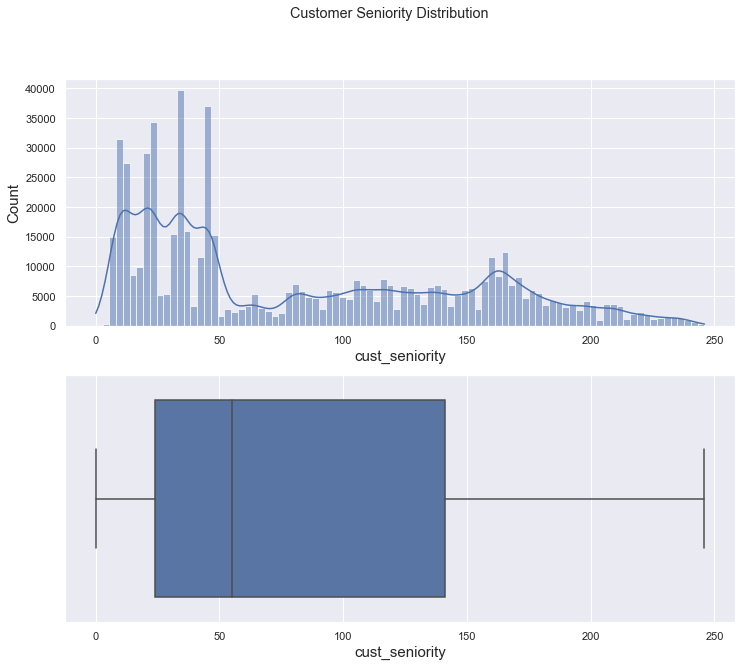

In [49]:
fig, ax = plt.subplots(2,1, figsize = (12,10));

sns.histplot(df['cust_seniority'], kde = True, ax = ax[0]);
sns.boxplot(x = 'cust_seniority', data = df, ax = ax[1]);

plt.suptitle("Customer Seniority Distribution");

There are no outliers for this variable.

#### `indrel`: 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

In [50]:
print(any(df['indrel'].isna())) #No missing value
print()
df['indrel'].value_counts()

False



1.0     618399
99.0       773
Name: indrel, dtype: int64

In [51]:
df['indrel'] = df['indrel'].replace(99.0, 0.0)
df['indrel'].value_counts()

1.0    618399
0.0       773
Name: indrel, dtype: int64

#### **cust_type** : Customer type at the beginning of the month: 1 (First/Primary customer), 2 (co-owner), P (Potential), 3 (former primary), 4(former co-owner)

In [52]:
print(any(df['cust_type'].isna()))

df['cust_type'].value_counts()

False


1.0    619142
3.0        29
2.0         1
Name: cust_type, dtype: int64

Dropping co-owner category

In [53]:
df = df.drop(index = df.query("cust_type == 2.0").index, axis = 0).reset_index(drop = True)

#### `cust_rel_time`: Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)

In [54]:
print(any(df['cust_rel_time'].isna()))

df['cust_rel_time'].value_counts()

False


A    324115
I    295027
P        29
Name: cust_rel_time, dtype: int64

"P" refers to former customers. Since the bank is only interested in current customers, I will drop observations having `tripel_1mes` has "P".

In [55]:
to_drop = df.query("cust_rel_time == 'P'").index

df = df.drop(index = to_drop, axis = 0).reset_index(drop = True)
print(df.shape)

(619142, 45)


#### `cust_res_index`: Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)

In [56]:
print(any(df['cust_res_index'].isna()))

df['cust_res_index'].value_counts()

False


S    615459
N      3683
Name: cust_res_index, dtype: int64

In [57]:
df['cust_res_index'] = df['cust_res_index'].map({"S" : 1, "N" : 0})
df['cust_res_index'].value_counts()

1    615459
0      3683
Name: cust_res_index, dtype: int64

#### `is_foreign`: Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)

In [58]:
print(any(df['is_foreign'].isna()))

df['is_foreign'].value_counts()

False


N    592113
S     27029
Name: is_foreign, dtype: int64

In [59]:
df['is_foreign'] = df['is_foreign'].map({"S" : 1, "N" : 0})
df['is_foreign'].value_counts()

0    592113
1     27029
Name: is_foreign, dtype: int64

#### `channel_to_join`: channel used by the customer to join

In [60]:
pd.set_option('display.max_columns', None)
print(df['channel_to_join'].isna().sum())
df[df['channel_to_join'].isna()]

26


,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,is_foreign,channel_to_join,deceased_index,addres_type,cod_prov,name_province,activity_index,household_income,saving_acc,guarantees,current_acc,derivada_acc,payroll_acc,junior_acc,mass_particular_acc,particular_acc,particular_plus_acc,short_term_deposit,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day
30741,N,ES,H,23,1.0,0,0.0,1.0,A,1,0,NaN,N,1.0,45.0,TOLEDO,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,7,0
57474,N,ES,V,47,1.0,1,1.0,1.0,A,1,0,NaN,N,1.0,25.0,LERIDA,1.0,49707.87,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,12,0
98766,N,ES,V,44,0.0,58,1.0,1.0,A,1,0,NaN,N,1.0,28.0,MADRID,1.0,158917.77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0,2010,8,0
100697,N,ES,V,42,1.0,0,1.0,1.0,I,1,0,NaN,N,1.0,28.0,MADRID,1.0,97555.77,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2010,12,3
156776,N,ES,H,21,1.0,0,1.0,1.0,A,1,0,NaN,N,1.0,8.0,BARCELONA,0.0,131768.82,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2014,7,3
202683,N,ES,V,32,1.0,0,1.0,1.0,I,1,0,NaN,N,1.0,28.0,MADRID,0.0,31722.21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2014,11,2
248173,N,ES,H,66,0.0,90,1.0,1.0,A,1,0,NaN,N,1.0,36.0,PONTEVEDRA,0.0,263960.61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,2007,9,4
248395,N,ES,V,58,0.0,63,1.0,1.0,A,1,0,NaN,N,1.0,28.0,MADRID,0.0,148147.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,2006,1,5
263197,N,ES,V,62,0.0,88,1.0,1.0,A,1,0,NaN,N,1.0,28.0,MADRID,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,2005,4,4
296556,N,ES,H,57,0.0,59,1.0,1.0,A,1,1,NaN,N,1.0,28.0,MADRID,1.0,528905.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0,2004,2,2


There are 26 observations with missing values.

In [61]:
df.query('cust_residence == "ES"')['channel_to_join'].value_counts(normalize = True)

KHE    0.344959
KAT    0.266617
KFC    0.238385
KFA    0.032970
KHD    0.009460
         ...   
KGU    0.000002
KGN    0.000002
KCT    0.000002
KDB    0.000002
KDI    0.000002
Name: channel_to_join, Length: 155, dtype: float64

In [62]:
df[df['channel_to_join'].isna()]['cust_rel_time'].value_counts()

A    20
I     6
Name: cust_rel_time, dtype: int64

In [63]:
df.query('cust_rel_time == "A"')['channel_to_join'].value_counts()

KAT    112302
KFC     99836
KHE     53504
KFA     14706
KHK      4675
        ...  
KFV         1
KEF         1
KCX         1
KHO         1
KGN         1
Name: channel_to_join, Length: 148, dtype: int64

All of the observations with missing values are from those customers from Spain. Therefore, I will impute this values with the mode of those customers from Spain.

In [64]:
val = df.query("cust_rel_time=='A' & cust_residence=='ES' & name_province=='MADRID'")['channel_to_join'].mode()[0]

df['channel_to_join'] = df['channel_to_join'].fillna(val)

#### `deceased_index`: Deceased index. N/S

In [65]:
print(any(df['deceased_index'].isna()))

df['deceased_index'].value_counts()

False


N    617556
S      1586
Name: deceased_index, dtype: int64

In [66]:
df['deceased_index'] = df['deceased_index'].map({"S" : 1, "N" : 0})
df['deceased_index'].value_counts()

0    617556
1      1586
Name: deceased_index, dtype: int64

#### `addres_type`: Address type. 1, primary address

In [67]:
print(any(df['addres_type'].isna()))

df['addres_type'].value_counts()

False


1.0    619142
Name: addres_type, dtype: int64

Since there is only one category for this variable, I will drop this.

In [68]:
df = df.drop('addres_type', axis = 1)
print(df.shape)

(619142, 44)


#### `cod_prov` & `name_province`: Province code (customer's address) / Province name

In [69]:
df['cod_prov'].value_counts()

28.0    201860
8.0      53958
46.0     29219
41.0     28927
15.0     20351
30.0     18079
29.0     17602
50.0     15793
11.0     14144
3.0      13493
36.0     13204
33.0     12178
47.0     11018
35.0     10694
6.0       9209
48.0      8469
45.0      8210
18.0      7934
37.0      7760
39.0      6949
14.0      6856
10.0      6399
21.0      6062
13.0      5538
2.0       5246
7.0       5051
12.0      4746
9.0       4381
27.0      4086
32.0      4057
31.0      3987
17.0      3837
43.0      3827
26.0      3811
24.0      3708
25.0      3433
20.0      3201
38.0      2995
23.0      2849
16.0      2780
4.0       2573
19.0      2571
49.0      2389
34.0      2277
40.0      1924
22.0      1799
5.0       1788
1.0       1674
44.0      1054
42.0       759
52.0       437
51.0       314
Name: cod_prov, dtype: int64

In [70]:
df['name_province'].value_counts()

MADRID                    201860
BARCELONA                  53958
VALENCIA                   29219
SEVILLA                    28927
CORUÑA, A                  20351
MURCIA                     18079
MALAGA                     17602
ZARAGOZA                   15793
CADIZ                      14144
ALICANTE                   13493
PONTEVEDRA                 13204
ASTURIAS                   12178
VALLADOLID                 11018
PALMAS, LAS                10694
BADAJOZ                     9209
BIZKAIA                     8469
TOLEDO                      8210
GRANADA                     7934
SALAMANCA                   7760
CANTABRIA                   6949
CORDOBA                     6856
CACERES                     6399
HUELVA                      6062
CIUDAD REAL                 5538
ALBACETE                    5246
BALEARS, ILLES              5051
CASTELLON                   4746
BURGOS                      4381
LUGO                        4086
OURENSE                     4057
NAVARRA   

Both of these variables are same since one `name_province` is the name of the province and `cod_prov` is the number assigned to the province. Hence I will remove `cod_prov`.

In [71]:
df = df.drop('cod_prov', axis = 1)
df.shape

(619142, 43)

In [72]:
print(df['name_province'].isna().sum())
df[df['name_province'].isna()]

3682


,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,is_foreign,channel_to_join,deceased_index,name_province,activity_index,household_income,saving_acc,guarantees,current_acc,derivada_acc,payroll_acc,junior_acc,mass_particular_acc,particular_acc,particular_plus_acc,short_term_deposit,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day
2022,N,CA,V,53,0.0,35,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,1,2012,8,4
4121,N,CH,V,34,0.0,35,1.0,1.0,A,0,0,KFC,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,0
4320,N,CL,V,40,0.0,35,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,2
5875,N,IE,V,28,0.0,35,1.0,1.0,A,0,0,KFC,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0,2012,8,0
15145,N,AT,V,43,0.0,34,1.0,1.0,A,0,1,KFA,0,NaN,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,1,2012,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591081,N,DE,V,43,0.0,20,1.0,1.0,A,0,0,KFC,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0,2013,11,0
595865,N,ES,V,45,0.0,19,1.0,1.0,A,1,0,KFC,0,NaN,1.0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0,1.0,1,2013,12,4
599212,N,DE,V,38,0.0,19,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2013,12,4
611885,N,GB,V,36,0.0,19,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2013,7,3


There are about 3k missing values for this column. Most of the customers are not from Spain. Therefore, I will impute this column with the mode of the category of customers outside of Spain.

In [73]:
df[df['name_province'].isna()]['cust_residence'].value_counts()

FR    288
AR    276
DE    256
GB    254
CO    201
     ... 
KZ      1
CD      1
CF      1
BZ      1
GE      1
Name: cust_residence, Length: 113, dtype: int64

In [74]:
df.query('cust_residence != "ES"')['name_province'].value_counts()

MADRID         4
GUADALAJARA    1
PALMAS, LAS    1
Name: name_province, dtype: int64

In [75]:
#Imputing for thise customers from Spain.
(df[df['name_province'].isna()]['cust_residence'] == "ES").sum()

5

In [76]:
%%time

# Imputing for those customers outside of Spain
for i in df[df['name_province'].isna()].index:
    if df['cust_residence'][i] != "ES":
        df['name_province'][i] = "Foreign"
    else:
        df['name_province'][i] = "MADRID"

Wall time: 3.86 s


#### `activity_index`: Activity index (1, active customer; 0, inactive customer)

In [77]:
print(any(df['activity_index'].isna()))

df['activity_index'].value_counts()

False


1.0    333059
0.0    286083
Name: activity_index, dtype: int64

#### `household_income`: Gross income of the household

In [78]:
df['household_income'].isna().sum()

104727

Around 100k+ missing values. 

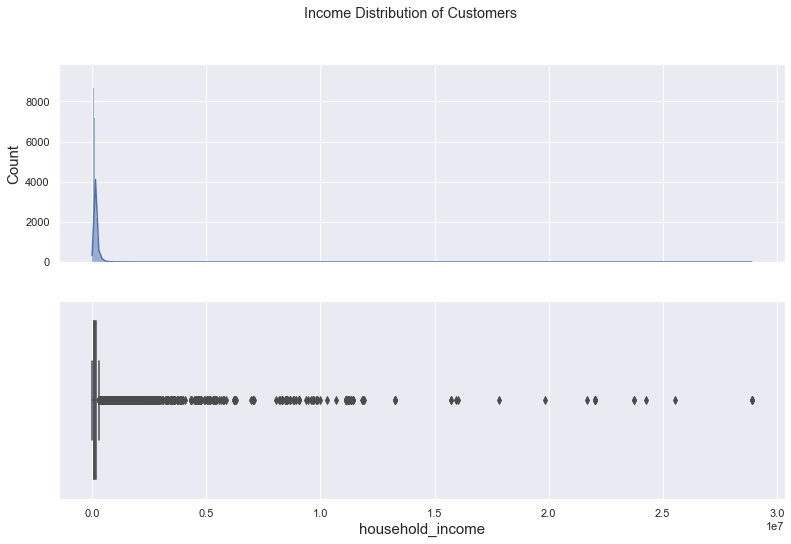

In [79]:
fig, ax = plt.subplots(2,1, figsize = (13,8), sharex = True);

sns.histplot(df['household_income'], kde = True, ax = ax[0]);
sns.boxplot(x = 'household_income', data = df, ax = ax[1]);

plt.suptitle("Income Distribution of Customers");

In [80]:
df['household_income'].describe()

count    5.144150e+05
mean     1.346014e+05
std      2.256816e+05
min      1.202730e+03
25%      6.919879e+04
50%      1.026161e+05
75%      1.570513e+05
max      2.889440e+07
Name: household_income, dtype: float64

We can see that the distribution is extremely skewed. Only fewer households earns income higher than 100k. Therefore imputing this variable with mean would not be the right approach. 

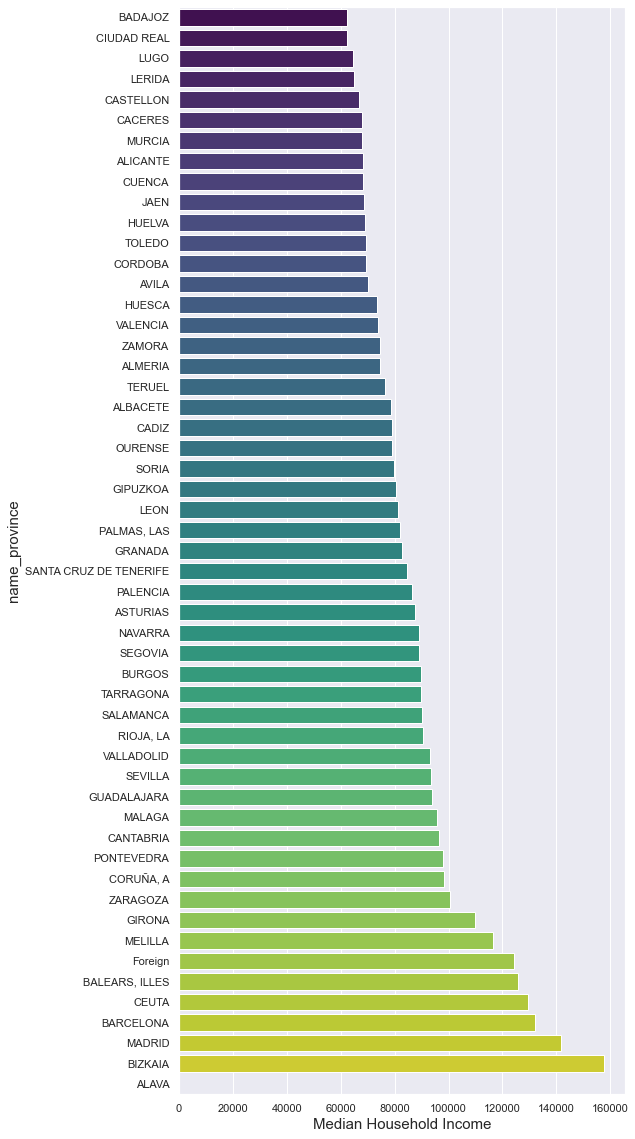

In [81]:
temp_df = df.groupby('name_province').agg({'household_income' : 'median'}).sort_values('household_income').reset_index()

plt.figure(figsize = (8, 20));
sns.barplot(x = 'household_income', y = 'name_province', data = temp_df, palette = "viridis");
plt.xlabel("Median Household Income");

We can see certain cities have higher median income compared to other cities. Therefore, I will impute this variable by filtering by province and then taking the median income of that province.

In [82]:
%%time
for city in df['name_province'].unique():
    if city == "ALAVA":
        df.loc[(df['name_province'] == f"{city}") & (df['household_income'].isna()), "household_income"] = \
        df['household_income'].median()
    else:
        df.loc[(df['name_province'] == f"{city}") & (df['household_income'].isna()), "household_income"] = \
        df.query(f'name_province == "{city}"')['household_income'].median()

Wall time: 3.6 s


In [83]:
df.isna().sum()

emp_index                   0
cust_residence              0
cust_gender                 0
age                         0
new_cust_index              0
cust_seniority              0
indrel                      0
cust_type                   0
cust_rel_time               0
cust_res_index              0
is_foreign                  0
channel_to_join             0
deceased_index              0
name_province               0
activity_index              0
household_income            0
saving_acc                  0
guarantees                  0
current_acc                 0
derivada_acc                0
payroll_acc                 0
junior_acc                  0
mass_particular_acc         0
particular_acc              0
particular_plus_acc         0
short_term_deposit          0
medium_term_deposits        0
long_term_deposits          0
e_account                   0
funds                       0
mortgage                    0
pensions1                   0
loans                       0
taxes     

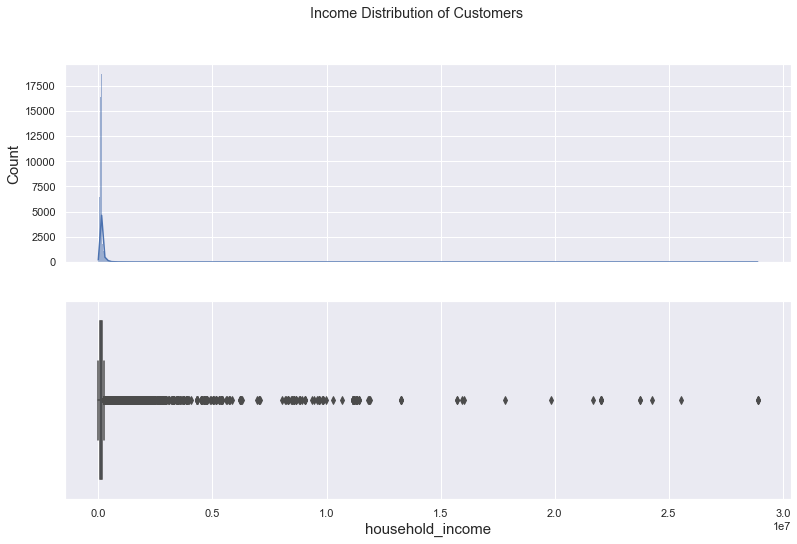

In [84]:
fig, ax = plt.subplots(2,1, figsize = (13,8), sharex = True);

sns.histplot(df['household_income'], kde = True, ax = ax[0]);
sns.boxplot(x = 'household_income', data = df, ax = ax[1]);

plt.suptitle("Income Distribution of Customers");

In [85]:
df['household_income'].describe()

count    6.191420e+05
mean     1.293463e+05
std      2.064072e+05
min      1.202730e+03
25%      7.123038e+04
50%      9.874539e+04
75%      1.466760e+05
max      2.889440e+07
Name: household_income, dtype: float64

As seen from above plot, the distribution is highly skewed. I will check whether applying feature scaling technique such as QuantileTransformer will help with the distribution.

In [86]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution = 'normal')

scaled = qt.fit_transform(df[['household_income']])

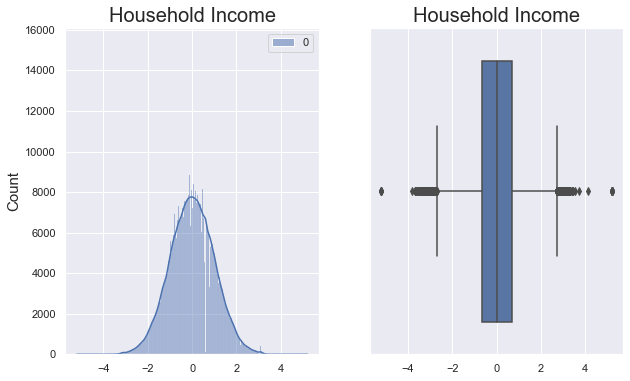

In [87]:
fig, ax = plt.subplots(1,2, figsize = (10,6))

sns.histplot(scaled, kde = True, ax = ax[0]).set_title("Household Income");
sns.boxplot(scaled, ax = ax[1]).set_title("Household Income");

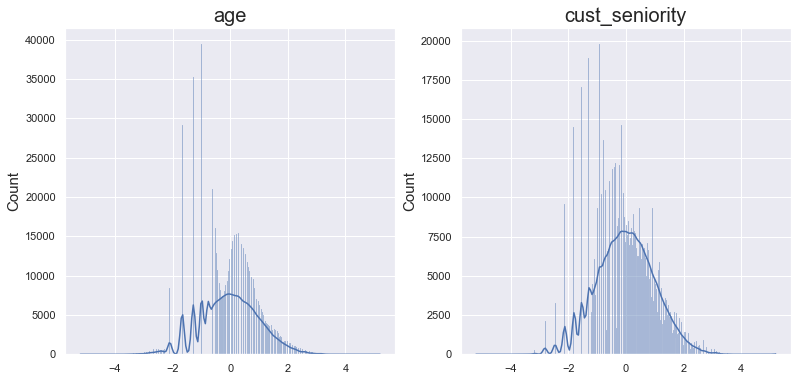

In [88]:
qt = QuantileTransformer(output_distribution = 'normal')

qt_scaled = qt.fit_transform(df[['age', 'cust_seniority']])

fig, ax = plt.subplots(1,2, figsize = (13,6))

sns.histplot(qt_scaled[:,0], kde = True, ax = ax[0]).set_title("age");
sns.histplot(qt_scaled[:,1], kde = True, ax = ax[1]).set_title("cust_seniority");

We can see from the above plots that quantile transformer is good at transforming all of three variables to nearly normal distribution. Hence, for feature scaling, QuantileTransformer will be used.

In [89]:
df.shape

(619142, 43)

### Bank Products

In [90]:
prod_cols = ['saving_acc', 'guarantees', 'current_acc', 'derivada_acc', 
             'payroll_acc', 'junior_acc', 'mass_particular_acc', 'particular_acc',
             'particular_plus_acc', 'short_term_deposit', 'medium_term_deposits', 'long_term_deposits', 
             'e_account', 'funds', 'mortgage', 'pensions1', 
             'loans', 'taxes', 'credit_card', 'securities',
             'home_account', 'payroll', 'pensions2', 'direct_debit']

labels = [
    "Saving Account", "Guarantees", "Current Accounts", "Derivada Account", "Payroll Account",
    "Junior Account", "Más particular Account", "particular Account", "particular Plus Account",
    "Short-term deposits", "Medium-term deposits", "Long-term deposits", "e-account", 
    "Funds", "Mortgage", "Pensions", "Loans", "Taxes", "Credit Card", "Securities", 
    "Home Account", "Payroll", "Pensions", "Direct Debit"
]

In [91]:
for col, name  in zip(prod_cols, labels):
    print(col, ":", name)
    print("-" * 50)
    print(f'Missing Values: {df[col].isna().sum()}')
    print("Value Counts")
    print(df[col].value_counts())
    print()

saving_acc : Saving Account
--------------------------------------------------
Missing Values: 0
Value Counts
0    619053
1        89
Name: saving_acc, dtype: int64

guarantees : Guarantees
--------------------------------------------------
Missing Values: 0
Value Counts
0    619122
1        20
Name: guarantees, dtype: int64

current_acc : Current Accounts
--------------------------------------------------
Missing Values: 0
Value Counts
1    484897
0    134245
Name: current_acc, dtype: int64

derivada_acc : Derivada Account
--------------------------------------------------
Missing Values: 0
Value Counts
0    618842
1       300
Name: derivada_acc, dtype: int64

payroll_acc : Payroll Account
--------------------------------------------------
Missing Values: 0
Value Counts
0    559940
1     59202
Name: payroll_acc, dtype: int64

junior_acc : Junior Account
--------------------------------------------------
Missing Values: 0
Value Counts
0    611544
1      7598
Name: junior_acc, dtype: in

Only 2 columns featuring certain bank products have missing values. I will impute these with the mode again.

In [92]:
df['pensions1']

0         0
1         0
2         0
3         0
4         0
         ..
619137    0
619138    0
619139    0
619140    0
619141    0
Name: pensions1, Length: 619142, dtype: int64

In [93]:
df['pensions2']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
619137    0.0
619138    0.0
619139    0.0
619140    0.0
619141    0.0
Name: pensions2, Length: 619142, dtype: float64

In [94]:
compare_idx = df[df['pensions2'].notna()].index
print(len(compare_idx))

619080


In [95]:
(df.loc[compare_idx, 'pensions1'] == df.loc[df['pensions2'].notna(), 'pensions2']).sum()

572129

Both of these accounts are different.

In [96]:
df['payroll'] = df['payroll'].fillna(df['payroll'].mode()[0])
df['pensions2'] = df['pensions2'].fillna(df['pensions2'].mode()[0])

In [97]:
df.isna().sum()

emp_index                  0
cust_residence             0
cust_gender                0
age                        0
new_cust_index             0
cust_seniority             0
indrel                     0
cust_type                  0
cust_rel_time              0
cust_res_index             0
is_foreign                 0
channel_to_join            0
deceased_index             0
name_province              0
activity_index             0
household_income           0
saving_acc                 0
guarantees                 0
current_acc                0
derivada_acc               0
payroll_acc                0
junior_acc                 0
mass_particular_acc        0
particular_acc             0
particular_plus_acc        0
short_term_deposit         0
medium_term_deposits       0
long_term_deposits         0
e_account                  0
funds                      0
mortgage                   0
pensions1                  0
loans                      0
taxes                      0
credit_card   

### All missing values has been taken care of!

In [98]:
product_df = df.groupby('age').agg({col : 'sum' for col in prod_cols})
product_df

,saving_acc,guarantees,current_acc,derivada_acc,payroll_acc,junior_acc,mass_particular_acc,particular_acc,particular_plus_acc,short_term_deposit,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit
age,,,,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,7,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.0,0.0,0
3,0,0,0,0,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,0,0,1,0,0,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5,0,0,0,0,0,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6,0,0,0,0,0,177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0,0,4,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
112,0,0,4,0,1,0,0,5,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,1.0,2
113,0,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0


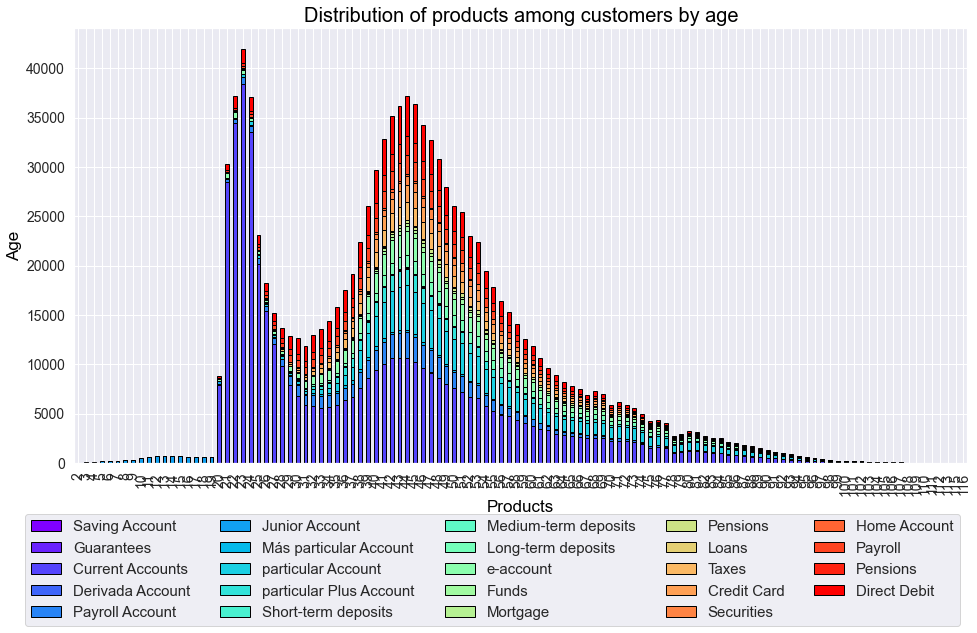

In [99]:
product_df.plot(kind='bar', stacked=True, fontsize=14, figsize=[16,8], colormap='rainbow', 
               edgecolor = "black")
plt.title('Distribution of products among customers by age', fontsize=20, color='black') 
plt.xlabel('Products', fontsize=17, color='black') 
plt.ylabel('Age', fontsize=17, color='black') 
# plt.ticklabel_format(style = 'plain')
plt.legend(labels = labels, prop={'size':15}, loc=1, bbox_to_anchor=(1.0, -0.1), ncol = 5);

Above graph referred from [here](https://medium.com/@ravitee/santander-product-recommendation-ee4122d15072)

In [100]:
#Proportion of products by age of customers
prod_prop = product_df.div(product_df.sum(axis = 1), axis = 0)

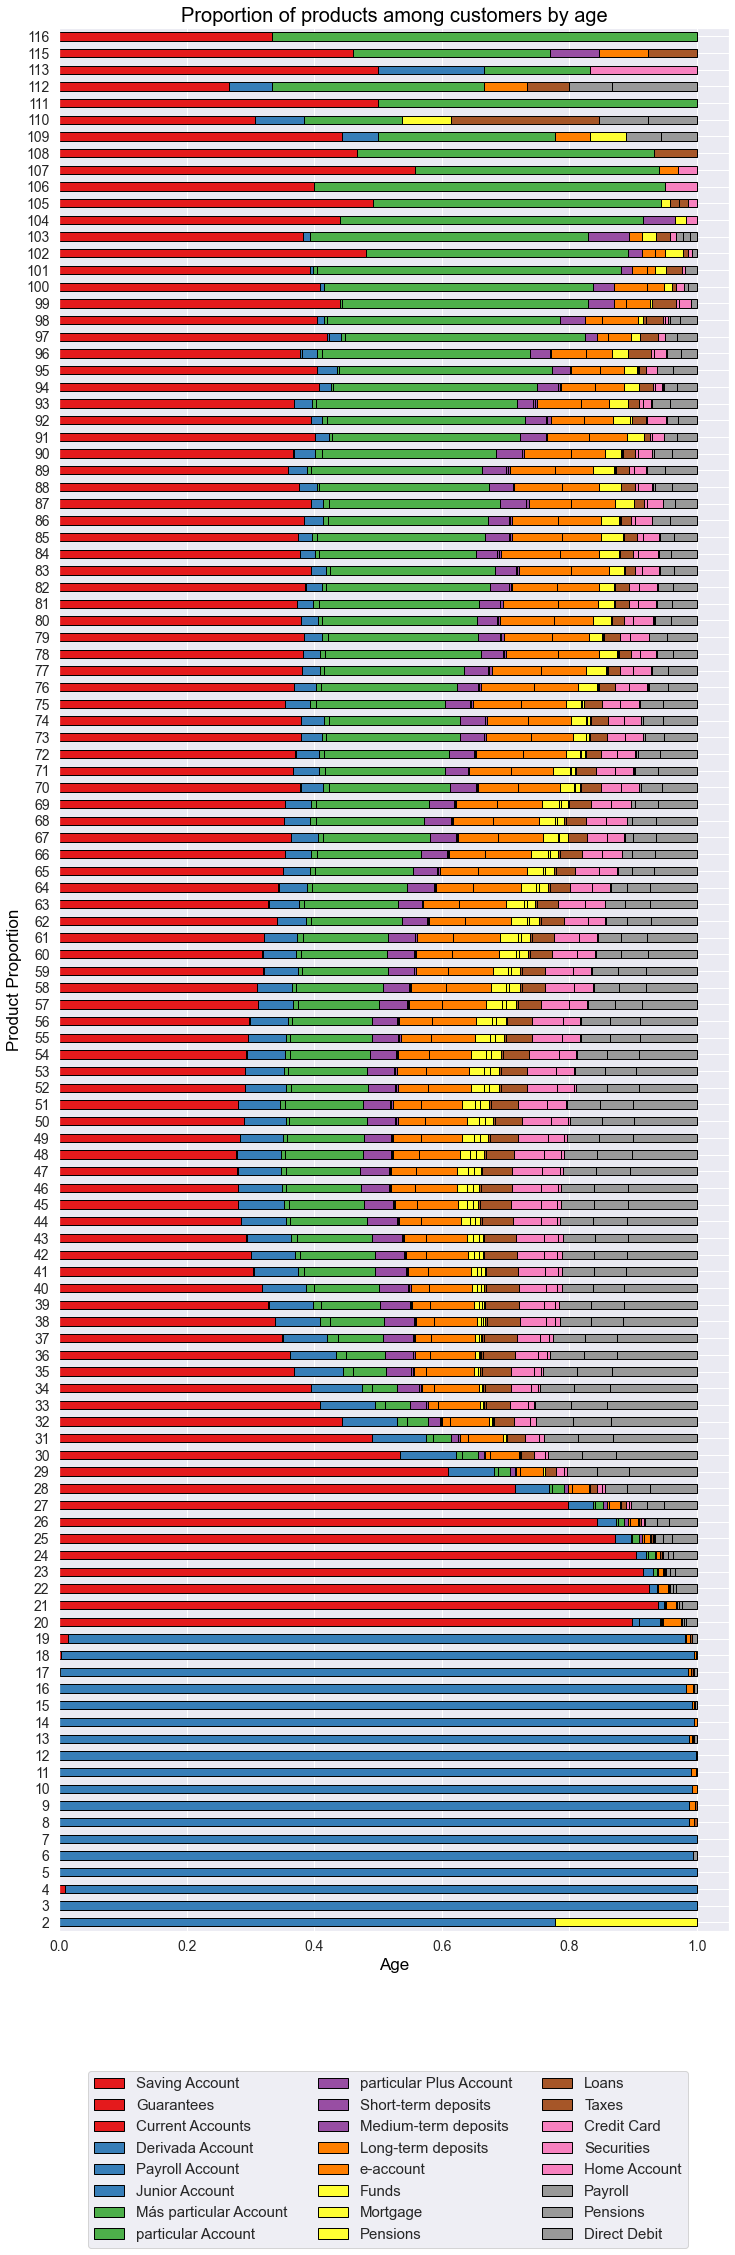

In [101]:
prod_prop.plot(kind = 'barh', stacked = True, fontsize=14, figsize=[12,35], colormap='Set1', 
               edgecolor = "black");

plt.title('Proportion of products among customers by age', fontsize=20, color='black') ;
plt.xlabel('Age', fontsize=17, color='black') ;
plt.ylabel('Product Proportion', fontsize=17, color='black') ;
plt.legend(labels = labels, prop={'size':15}, loc=1, bbox_to_anchor=(0.95, -0.07), ncol = 3);

Customer with age above 25 opt for more products from the bank.

The above clearly shows some customers hold multiple accounts. A new variable will be created that sums all the products together to see the total number of accounts a customer holds.

In [102]:
df['total_accounts'] =  df.iloc[:, 16:-4].sum(axis = 1)

In [103]:
df['total_accounts'].value_counts()

1.0     405961
2.0      99998
3.0      42758
4.0      22018
0.0      17299
5.0      14033
6.0       9048
7.0       4751
8.0       2168
9.0        764
10.0       255
11.0        72
12.0        13
13.0         3
14.0         1
Name: total_accounts, dtype: int64

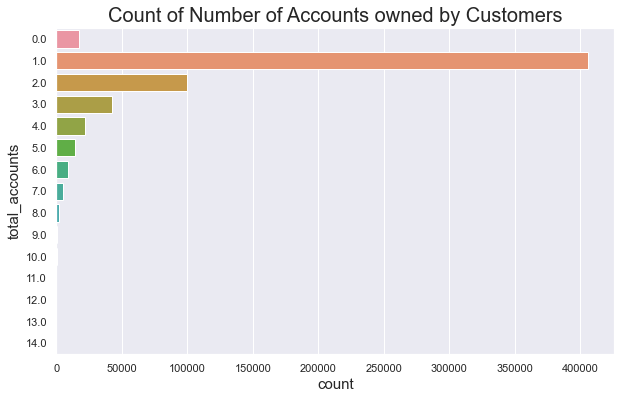

In [104]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'total_accounts', data = df);
plt.title("Count of Number of Accounts owned by Customers");

Majority of the customers only hold a single account. But there are considerable other customers holding multiple accounts.

In [105]:
df.duplicated().sum()

12485

There are almost 13K rows with same attributes. I will create a new column that will contain the number of duplicates for rows having the same attributes, followed by dropping all duplicate observations. This column can potentially be used as weights for those observations having same attributes.

In [106]:
df['dup_rows_count'] = df.groupby(df.columns.to_list())['emp_index'].transform("size")

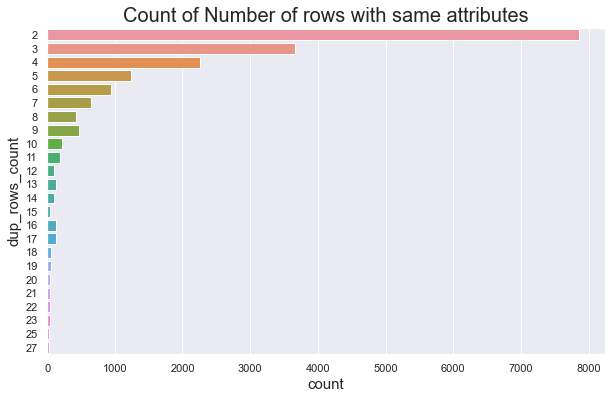

In [107]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'dup_rows_count', data = df.query("dup_rows_count > 1"));
plt.title("Count of Number of rows with same attributes");

In [108]:
df = df.drop_duplicates().reset_index(drop = True)

In [109]:
df.duplicated().sum()

0

In [110]:
any(df.isna().sum())

False

#### Categorical Encoding

There are some columns with high cardinality, having more than 100 categories. In order to reduce the number of categories, I will group them by similarity.

In [111]:
len(df['cust_residence'].unique())

113

In [112]:
df['cust_residence'].unique()

array(['ES', 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE', 'DO',
       'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO', 'HN',
       'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR', 'NI',
       'HK', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU', 'GT', 'GA', 'NO',
       'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'CZ', 'ET', 'CM', 'SA',
       'CI', 'QA', 'SG', 'BO', 'BZ', 'UY', 'MD', 'BA', 'CF', 'KR', 'LU',
       'NG', 'CD', 'ZA', 'AU', 'KZ', 'CU', 'DK', 'JP', 'SK', 'GM', 'AO',
       'HR', 'PK', 'PA', 'MK', 'LY', 'LT', 'TH', 'GQ', 'GN', 'TR', 'IS',
       'KE', 'VN', 'RS', 'AD', 'NZ', 'OM', 'EG', 'LV', 'ML', 'CG', 'GW',
       'HU', 'DZ', 'SL', 'GI', 'KH', 'MM', 'BY', 'PH', 'KW', 'GH', 'TN',
       'TG', 'LB', 'GE'], dtype=object)

There are 113 countries. I will combine some categories by continent. Only ES will be kept separate.

In [ ]:
#importing country by continent data

url = "https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv"

country = pd.read_csv(url)
country

In [ ]:
#There are some missing values. This is actually because pandas sees "NA" and 
#considers these as missing values.

country[country['Two_Letter_Country_Code'].isna()]

In [ ]:
country['Two_Letter_Country_Code'] = country['Two_Letter_Country_Code'].fillna("NA")

In [ ]:
country['Two_Letter_Country_Code'].unique()

In [ ]:
country['Continent_Code'].unique()

In [ ]:
country[country['Continent_Code'].isna()]

All of these countries belong to the continent of North America

In [ ]:
country['Continent_Code'] = country['Continent_Code'].fillna("NA")

In [ ]:
country = country[['Continent_Code', 'Two_Letter_Country_Code']]
country

In [ ]:
np.setdiff1d(df['cust_residence'].unique(), country['Two_Letter_Country_Code'].unique())

In [ ]:
country.loc[country['Two_Letter_Country_Code'] == 'US', 'Continent_Code']

In [ ]:
%%time
for i in df['cust_residence'].unique():
    if i == "ES":
        pass
    else:
        df.loc[df['cust_residence'] == i, "cust_residence"] = \
        country.loc[country['Two_Letter_Country_Code'] == i, 'Continent_Code'].unique()[0]

In [ ]:
df

In [ ]:
df['cust_residence'].unique()

In [ ]:
#Renaming categories to avoid confusions in future

df['cust_residence'] = df['cust_residence'].map({
    'ES' : "Spain",
    'NA' : "NorthAmerica",
    'EU' : "Europe",
    'AS' : "Asia",
    'AF' : "Africa",
    'SA' : "SouthAmerica",
    'OC' : 'Oceania'
})

In [ ]:
df['cust_residence'].value_counts()

From 103 categories, we have grouped countries (except ES) by continent.

In [ ]:
#Checking for value counts for categorical variables

for col in df.select_dtypes(include = "object").columns:
    print(df[col].value_counts())
    print()

In [ ]:
df.isna().sum()

Now, the dataset is cleaned and ready for the next steps (EDA and modeling)

In [ ]:
#Saving a copy
df_preprocessed = df.copy()

Next, I will create a pipeline that will encode categorical columns to numerical data types. I will later pickle this encoder to be used for the next steps.

For columns that has more than 100 categories, I will encode those variables with CountFrequency encoder where each category will be encoded with its frequency within that column. 

For other categorical columns having lesser categories, I will apply one-hot encoding.

In [ ]:
#Encoding

from sklearn.pipeline import make_pipeline
from feature_engine.encoding import OneHotEncoder, CountFrequencyEncoder

col_transformer = make_pipeline(
    (OneHotEncoder(top_categories = 4, variables = ["emp_index"])),
    (OneHotEncoder(variables = ["cust_gender", "cust_rel_time", "cust_residence"])), 
    (CountFrequencyEncoder(encoding_method='frequency', variables=['name_province', 'channel_to_join']))
)

col_transformer

In [ ]:
%%time
df_transformed = col_transformer.fit_transform(df)

df_transformed

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (13,6))

sns.histplot(df_transformed['channel_to_join'], kde = True, ax = ax[0]);
sns.histplot(df_transformed['name_province'], kde = True, ax = ax[1]);

In [ ]:
df_transformed.columns

In [ ]:
df_preprocessed.shape

In [ ]:
df_transformed.shape

In [ ]:
606227/1000000 * 100

In [ ]:
1000000 - 606227

In [ ]:
corr = df_transformed.corr()
select_corr = corr[abs(corr) > 0.5]

plt.figure(figsize = (15,15))
sns.heatmap(select_corr, annot = True, center = 0, fmt = ".1g", annot_kws={"fontsize":13, 
                                                                           "color" : "black"});

All missing values, duplicated values and outliers has been taken care of. From 1 million observations, almost 400K have been dropped. Through the techniques Joseph has employed, around 60% of data has been maintained.

In [ ]:
df_transformed

In [ ]:
df_preprocessed

### Saving preprocessed dataset and column transformer

In [ ]:
#Saving latest changes to a CSV file
# df_preprocessed.to_csv("df_preprocessed.csv", index = False)

In [ ]:
import pickle
pickle.dump(col_transformer, open('col_transformer.pkl','wb'))